In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Machine Learning Datasets\placement-dataset.csv")
df.head(4)

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1


In [3]:
df.isnull().sum().sum()

np.int64(12)

In [4]:
df['cgpa'].fillna(df['cgpa'].mean(), inplace=True)
df['iq'].fillna(df['iq'].mode()[0], inplace=True)

In [5]:
df['city'].unique()

array(['New York', 'Los Angeles', 'Chicago'], dtype=object)

In [6]:
df['city'] = df['city'].map({'Chicago': 1, 'Los Angeles': 2, 'New York': 3})

In [7]:
df.head(3)

,city,cgpa,iq,placement
0,3,6.800000,123.0,1
1,2,5.900000,106.0,0
2,1,5.965217,121.0,0


In [8]:
x = df.iloc[:, :-1]
y = df['placement']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [11]:
print(f"model accuracy: {lr.score(x_test, y_test)*100:.2f}")

model accuracy: 85.00


# Confusion Matrix Concepts

In [12]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [13]:
cm = confusion_matrix(y_test, lr.predict(x_test))

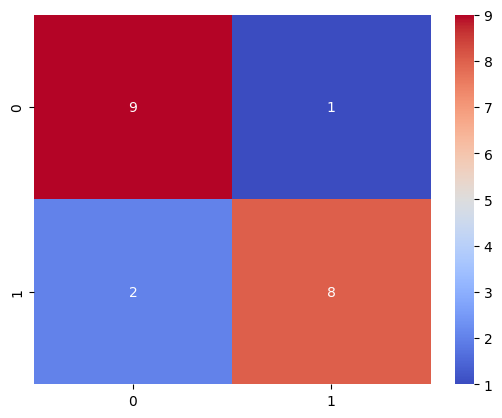

In [14]:
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

In [15]:
print(f"precision score: {precision_score(y_test, lr.predict(x_test))*100:.2f}")

precision score: 88.89


In [16]:
print(f"recall score: {recall_score(y_test, lr.predict(x_test))*100:.2f}")

recall score: 80.00


In [17]:
print(f"f1 score: {f1_score(y_test, lr.predict(x_test))*100:.2f}")

f1 score: 84.21
